<a href="https://colab.research.google.com/github/sakshiagarwal439/Fashion-Mnist/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

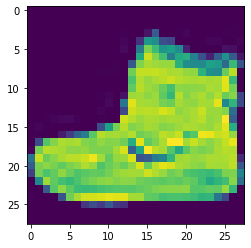

In [ ]:
 plt.imshow(X_train[0])

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

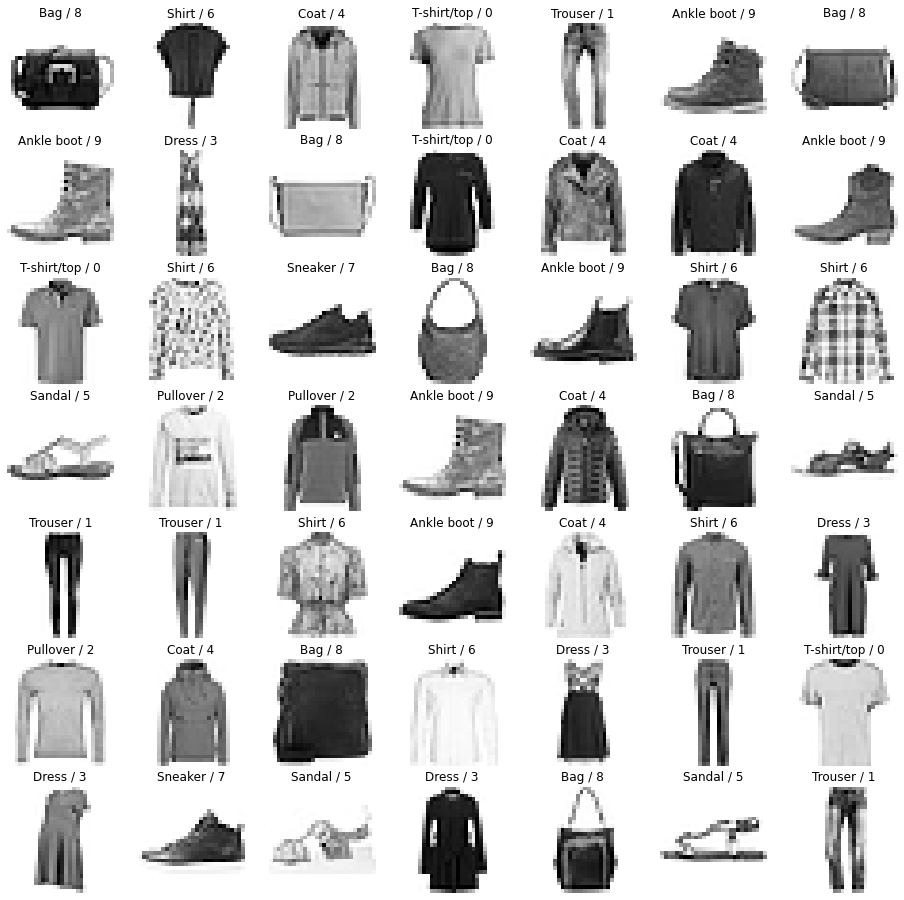

In [ ]:
plt.figure(figsize=(16,16))

j=1;
for i in np.random.randint(0, 1000, 49):
  plt.subplot(7, 7, j)
  j+=1
  plt.imshow(X_train[i], cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]] , y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
#Increase dimension of training dataset because CNN takes input as 4 dimensions
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
#Feature Scaling
X_train = X_train/ 255
X_test = X_test/255

In [ ]:
#Split Dataset into training and validation dataset
from sklearn.model_selection import train_test_split
X_train,X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2020)

In [ ]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [ ]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

In [ ]:
#CNN Model Building
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape = [28,28,1]),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=512, verbose = 1, validation_data = (X_val, y_val))

Epoch 1/10
94/94 [==============================] - 31s 20ms/step - loss: 0.6371 - accuracy: 0.7835 - val_loss: 0.4602 - val_accuracy: 0.8388
Epoch 2/10
94/94 [==============================] - 2s 16ms/step - loss: 0.3920 - accuracy: 0.8639 - val_loss: 0.3811 - val_accuracy: 0.8662
Epoch 3/10
94/94 [==============================] - 2s 16ms/step - loss: 0.3484 - accuracy: 0.8777 - val_loss: 0.3622 - val_accuracy: 0.8748
Epoch 4/10
94/94 [==============================] - 2s 16ms/step - loss: 0.3184 - accuracy: 0.8882 - val_loss: 0.3333 - val_accuracy: 0.8846
Epoch 5/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2948 - accuracy: 0.8969 - val_loss: 0.3147 - val_accuracy: 0.8908
Epoch 6/10
94/94 [==============================] - 2s 16ms/step - loss: 0.2756 - accuracy: 0.9038 - val_loss: 0.3064 - val_accuracy: 0.8930
Epoch 7/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2605 - accuracy: 0.9072 - val_loss: 0.2997 - val_accuracy: 0.8948
Epoch 8/10
9

In [ ]:
#Test the model

model.predict(np.expand_dims(X_test[0], axis=0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(2))

9

In [ ]:
y_test[0]

9

In [ ]:
y_pred = model.predict(X_test).round(2)

In [ ]:
y_pred

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.08, 0.09, 0.  ]], dtype=float32)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2865 - accuracy: 0.8965


[0.28648045659065247, 0.8964999914169312]

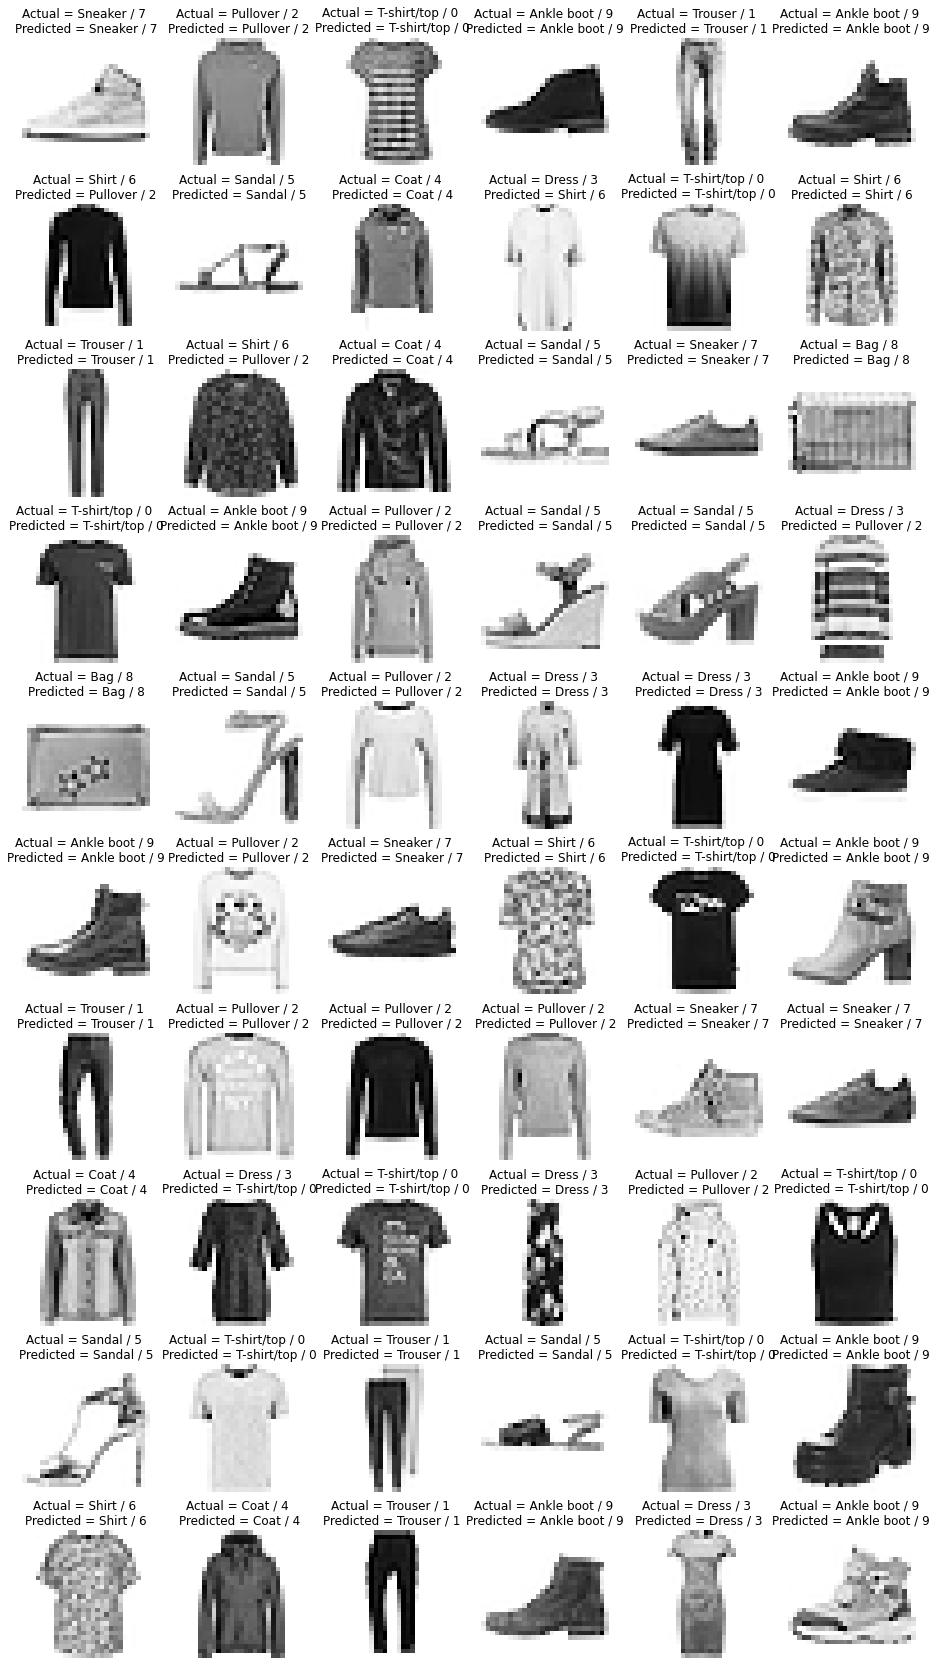

In [ ]:
#Visualize Output
plt.figure(figsize=(16,30))

j=1;
for i in np.random.randint(0, 1000, 60):
  plt.subplot(10, 6, j)
  j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]] , y_test[i], class_labels[np.argmax(y_pred[i])] , np.argmax(y_pred[i])))

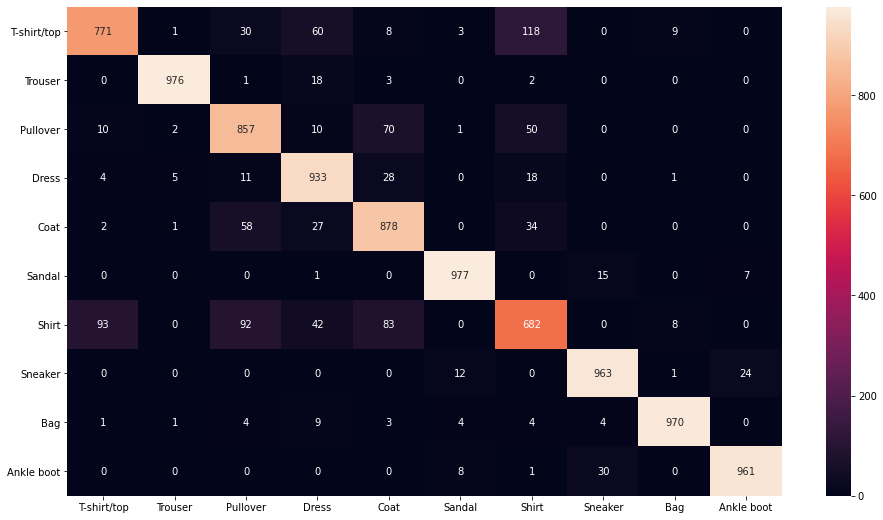

In [ ]:
 #Confusion Matrix

 from sklearn.metrics import confusion_matrix

 plt.figure(figsize = (16,9))
 y_pred_labels = [np.argmax(label) for label in y_pred]
 cm = confusion_matrix(y_test, y_pred_labels)

 #show cm
 sns.heatmap(cm, annot = True, fmt = 'd', xticklabels=class_labels, yticklabels = class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names = class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.77      0.82      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.86      0.83      1000
       Dress       0.85      0.93      0.89      1000
        Coat       0.82      0.88      0.85      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.75      0.68      0.71      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
#Save Model in colab
model.save("Fashion_classification_cnn_model.h5")

In [ ]:
#Save in drive
path = '/content/drive/MyDrive/CNN Models/Fashion_classification_cnn_model1.h5'
model.save(path)

In [ ]:
#To Load Model
model_deploy = keras.models.load_model(path)

In [ ]:
model_deploy.predict(X_test).round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.08, 0.09, 0.  ]], dtype=float32)

In [ ]:
#CNN - Building Complex Model

cnn_model2 = keras.models.Sequential([
                                      keras.layers.Conv2D(filters = 32, kernel_size=3, strides=(1,1), padding='valid', activation = 'relu', input_shape=[28,28,1]),
                                      keras.layers.MaxPooling2D(pool_size = (2,2)),
                                      keras.layers.Conv2D(filters = 64, kernel_size=3, strides=(2, 2), padding='same', activation = 'relu'),
                                      keras.layers.MaxPooling2D(pool_size = (2,2)),
                                      keras.layers.Flatten(),
                                      keras.layers.Dense(units = 128, activation = 'relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units = 256, activation = 'relu'),
                                      keras.layers.Dropout(0.25),
                                      keras.layers.Dense(units = 128, activation = 'relu'),
                                      keras.layers.Dense(units = 10, activation = 'softmax'),                                 
])

In [ ]:
cnn_model2.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model2.fit(X_train, y_train, epochs=20, batch_size = 512, verbose = 1, validation_data=(X_val, y_val))

Epoch 1/20
94/94 [==============================] - 3s 25ms/step - loss: 1.0223 - accuracy: 0.6125 - val_loss: 0.5580 - val_accuracy: 0.7859
Epoch 2/20
94/94 [==============================] - 2s 21ms/step - loss: 0.5334 - accuracy: 0.8007 - val_loss: 0.4380 - val_accuracy: 0.8357
Epoch 3/20
94/94 [==============================] - 2s 21ms/step - loss: 0.4379 - accuracy: 0.8411 - val_loss: 0.3866 - val_accuracy: 0.8599
Epoch 4/20
94/94 [==============================] - 2s 21ms/step - loss: 0.3843 - accuracy: 0.8590 - val_loss: 0.3468 - val_accuracy: 0.8698
Epoch 5/20
94/94 [==============================] - 2s 22ms/step - loss: 0.3557 - accuracy: 0.8705 - val_loss: 0.3414 - val_accuracy: 0.8718
Epoch 6/20
94/94 [==============================] - 2s 21ms/step - loss: 0.3334 - accuracy: 0.8778 - val_loss: 0.3114 - val_accuracy: 0.8844
Epoch 7/20
94/94 [==============================] - 2s 21ms/step - loss: 0.3143 - accuracy: 0.8834 - val_loss: 0.3113 - val_accuracy: 0.8836
Epoch 8/20
94

In [ ]:
cnn_model2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2686 - accuracy: 0.9050


[0.26863545179367065, 0.9049999713897705]

In [ ]:
path = "/content/drive/MyDrive/CNN Models/model2.h5"

cnn_model2.save(path)